<h2>Map Contour</h2>
<p>This code will generate the contour data from the given map.png

In [26]:
# libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
os.getcwd()

'd:\\Coding\\War of the ring\\War-of-the-Ring\\notebook'

In [ ]:
map = cv2.imread('../src/assets/images/map.png')
map_rgb = cv2.cvtColor(map, cv2.COLOR_BGR2RGB)

In [49]:
def plot_map(map):
    plt.figure(figsize=(10, 5))
    plt.axis('off')
    plt.imshow(map)

In [35]:
length_y, length_x, _ = map.shape

In [44]:
# cut the map so that only the main board remains
black_strip = np.zeros((50,3), dtype='uint8')
x_mid, y_mid = length_x//2, length_y//2
right_x, left_x = 0, length_x
up_y, down_y = 0, length_y

# find right_x
for i in range(0, length_x//2):
    if np.all(map[y_mid-25:y_mid+25, right_x, :] == black_strip):
        break
    right_x += 1
# find left_x
for i in range(0, length_x//2):
    if np.all(map[y_mid-25:y_mid+25, left_x-1, :] == black_strip):
        break
    left_x -= 1
# find up_y
for i in range(0, length_y//2):
    if np.all(map[up_y, x_mid-25:x_mid+25, :] == black_strip):
        break
    up_y += 1
# find down_y
for i in range(0, length_y//2):
    if np.all(map[down_y-1, x_mid-25:x_mid+25, :] == black_strip):
        break
    down_y -= 1

# cutout map
map_cut = map_rgb[up_y:down_y, right_x:left_x, :]

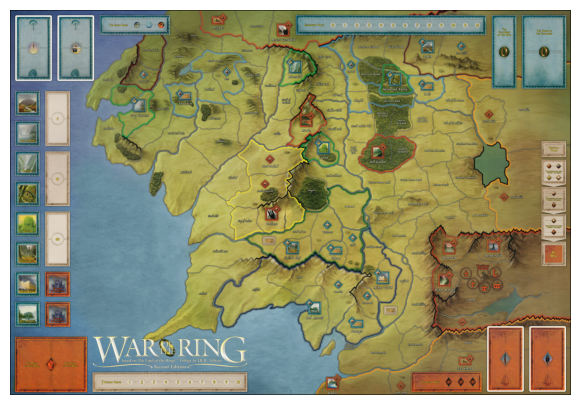

In [50]:
plot_map(map_cut)

In [ ]:
# 

In [42]:
np.all(black_strip == black_strip)

np.True_